In [1]:
using Pkg
Pkg.activate("..")
Pkg.instantiate() # Usually only need to run this once
using JPEC, Plots, Printf
gr()

  Activating project at `c:\Users\thlmi\OneDrive\바탕 화면\서울대\대학원\codes\JPEC\JPEC-github0708\JPEC`


Plots.GRBackend()

In [3]:

#=
======================================================================
1. VALIDATION FOR 1D CUBIC SPLINE (Real)
======================================================================
=#
println("\n--- Testing 1D Spline Derivatives and Integration ---")

# --- 1.1 Data Generation ---
# Using 20 nodes to create a periodic spline for sin(x) and cos(x)
xs_nodes = collect(range(0.0, stop=2*pi, length=20))
y1_nodes = sin.(xs_nodes)
y2_nodes = cos.(xs_nodes)
fs_nodes_matrix = hcat(y1_nodes, y2_nodes)

# --- 1.2 Spline Setup (bctype=3 for periodic)---
spline_real = JPEC.SplinesMod.spline_setup(xs_nodes, fs_nodes_matrix, 3)

# --- 1.3 Evaluation on a Fine Grid ---
xs_fine = collect(range(0.0, stop=2*pi, length=200))

# Evaluate the spline and its derivatives up to the 3rd order
f_s, f1_s, f2_s, f3_s = JPEC.SplinesMod.spline_eval(spline_real, xs_fine, 3)

# --- 1.4 Perform Integration ---
# This modifies the spline_real object in-place, adding the .fsi field
JPEC.SplinesMod.spline_integrate!(spline_real)

# The result of integration is stored at the original node points.
# spline_real.fsi now contains the cumulative integral values.
integral_s = spline_real.fsi

# --- 1.5 Analytical (True) Values ---
# True values for the function and its derivatives on the fine grid
true_f  = hcat(sin.(xs_fine),  cos.(xs_fine))
true_f1 = hcat(cos.(xs_fine), -sin.(xs_fine))
true_f2 = hcat(-sin.(xs_fine), -cos.(xs_fine))
true_f3 = hcat(-cos.(xs_fine),  sin.(xs_fine))

# True values for the integral on the original coarse grid (xs_nodes)
# Integral of sin(x) from 0 to t is -cos(t) - (-cos(0)) = 1 - cos(t)
# Integral of cos(x) from 0 to t is sin(t) - sin(0) = sin(t)
true_integral = hcat(1.0 .- cos.(xs_nodes), sin.(xs_nodes))


# --- 1.6 Plotting (Focusing on the first function, sin(x)) ---

# Plot for Function Value f(x)
p0 = plot(xs_fine, f_s[:, 1], label="Spline f(x)", title="Function: sin(x)", legend=:bottomleft)
plot!(p0, xs_fine, true_f[:, 1], ls=:dash, label="True f(x)")
scatter!(p0, xs_nodes, y1_nodes, label="OriginalNodes", markersize=3) # Show the original nodes
plot!(p0, xs_fine, (f_s[:, 1] .- true_f[:, 1]) .* 1000, ls=:dot, label="Error x1000", color=:red)

# Plot for 1st Derivative f'(x)
p1 = plot(xs_fine, f1_s[:, 1], label="Spline f'(x)", title="1st Deriv: cos(x)", legend=:bottomleft)
plot!(p1, xs_fine, true_f1[:, 1], ls=:dash, label="True f'(x)")
plot!(p1, xs_fine, (f1_s[:, 1] .- true_f1[:, 1]) .* 100, ls=:dot, label="Error x100", color=:red)

# Plot for 2nd Derivative f''(x)
p2 = plot(xs_fine, f2_s[:, 1], label="Spline f''(x)", title="2nd Deriv: -sin(x)", legend=:bottomleft)
plot!(p2, xs_fine, true_f2[:, 1], ls=:dash, label="True f''(x)")
plot!(p2, xs_fine, (f2_s[:, 1] .- true_f2[:, 1]), ls=:dot, label="Error", color=:red)

# Plot for 3rd Derivative f'''(x)
p3 = plot(xs_fine, f3_s[:, 1], label="Spline f'''(x)", title="3rd Deriv: -cos(x)", legend=:bottomleft)
plot!(p3, xs_fine, true_f3[:, 1], ls=:dash, label="True f'''(x)")
plot!(p3, xs_fine, (f3_s[:, 1] .- true_f3[:, 1]), ls=:dot, label="Error", color=:red)

# --- NEW PLOT FOR INTEGRATION ---
# Plot for Integral ∫f(t)dt
p4 = plot(xs_nodes, integral_s[:, 1], label="Spline Integral", title="Integral: 1-cos(x)", legend=:topleft, markershape=:circle, markersize=3)
plot!(p4, xs_nodes, true_integral[:, 1], ls=:dash, label="True Integral")
plot!(p4, xs_nodes, (integral_s[:, 1] .- true_integral[:, 1]) .* 1000, ls=:dot, label="Error x1000", color=:red)

# Combine all plots into a single figure
plot(p0, p1, p2, p3, p4, layout=(3, 2), size=(1200, 1000), margin=5Plots.mm)


--- Testing 1D Complex Spline Derivatives and Integration ---


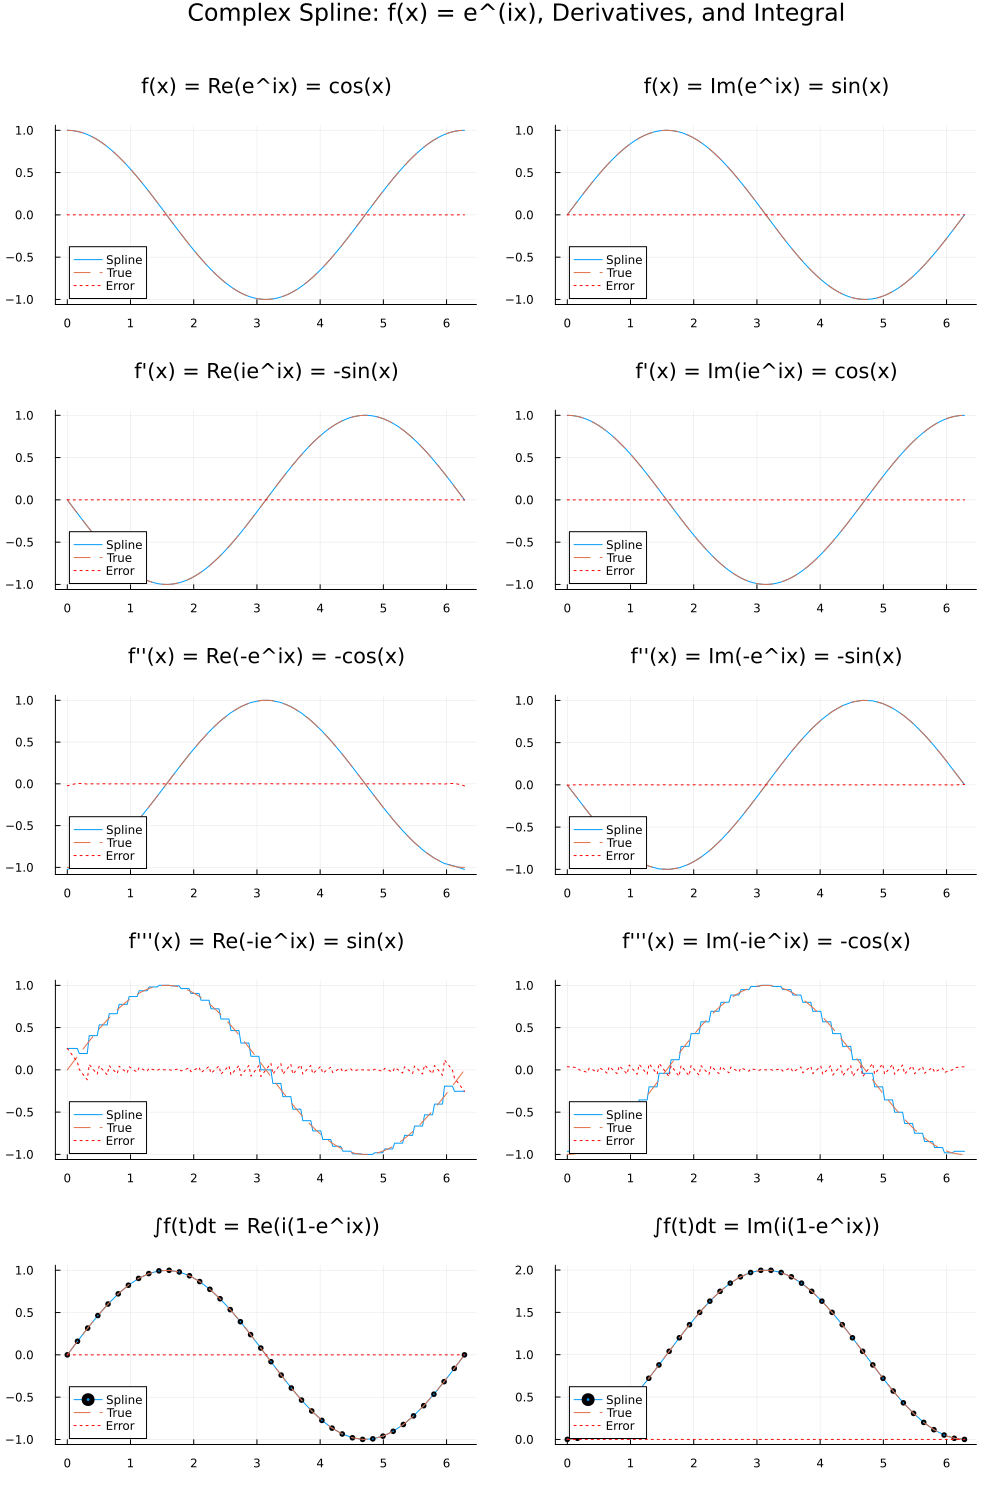

In [2]:

#=
======================================================================
2. VALIDATION FOR 1D CUBIC SPLINE (Complex)
======================================================================
=#
println("\n--- Testing 1D Complex Spline Derivatives and Integration ---")

# --- 2.1 Data Generation ---
xs_nodes = collect(range(0.0, stop=2*pi, length=40))
fs_complex_nodes = exp.(im .* xs_nodes)

# --- 2.2 Spline Setup (bctype=3 for periodic) ---
spline_complex = JPEC.SplinesMod.spline_setup(xs_nodes, fs_complex_nodes, 3)

# --- 2.3 Evaluation on a Fine Grid ---
xs_fine = collect(range(0.0, stop=2*pi, length=200))
f_cs, f1_cs, f2_cs, f3_cs = JPEC.SplinesMod.spline_eval(spline_complex, xs_fine, 3)

# --- 2.4 Perform Integration ---
# This modifies the spline_complex object in-place, adding the .fsi field
JPEC.SplinesMod.spline_integrate!(spline_complex)
integral_cs = spline_complex.fsi

# --- 2.5 Analytical (True) Values ---
true_f_c  = exp.(im .* xs_fine)
true_f1_c = im .* exp.(im .* xs_fine)
true_f2_c = -1 .* exp.(im .* xs_fine)
true_f3_c = -im .* exp.(im .* xs_fine)

# True values for the integral on the original node grid
# Integral of exp(ix) from 0 to t is i*(1 - exp(ix))
true_integral_c = im .* (1.0 .- exp.(im .* xs_nodes))

# --- 2.6 Plotting ---
# We will create a list of plots and then display them all at once.
plot_list_c = []

# --- Function Plots ---
p0_real = plot(xs_fine, real(f_cs), label="Spline", title="f(x) = Re(e^ix) = cos(x)", legend=:bottomleft)
plot!(p0_real, xs_fine, real(true_f_c), ls=:dash, label="True")
plot!(p0_real, xs_fine, real(f_cs) .- real(true_f_c), ls=:dot, label="Error", color=:red); push!(plot_list_c, p0_real)

p0_imag = plot(xs_fine, imag(f_cs), label="Spline", title="f(x) = Im(e^ix) = sin(x)", legend=:bottomleft)
plot!(p0_imag, xs_fine, imag(true_f_c), ls=:dash, label="True")
plot!(p0_imag, xs_fine, imag(f_cs) .- imag(true_f_c), ls=:dot, label="Error", color=:red); push!(plot_list_c, p0_imag)

# --- 1st Derivative Plots ---
p1_real = plot(xs_fine, real(f1_cs), label="Spline", title="f'(x) = Re(ie^ix) = -sin(x)", legend=:bottomleft)
plot!(p1_real, xs_fine, real(true_f1_c), ls=:dash, label="True")
plot!(p1_real, xs_fine, real(f1_cs) .- real(true_f1_c), ls=:dot, label="Error", color=:red); push!(plot_list_c, p1_real)

p1_imag = plot(xs_fine, imag(f1_cs), label="Spline", title="f'(x) = Im(ie^ix) = cos(x)", legend=:bottomleft)
plot!(p1_imag, xs_fine, imag(true_f1_c), ls=:dash, label="True")
plot!(p1_imag, xs_fine, imag(f1_cs) .- imag(true_f1_c), ls=:dot, label="Error", color=:red); push!(plot_list_c, p1_imag)

# --- 2nd Derivative Plots ---
p2_real = plot(xs_fine, real(f2_cs), label="Spline", title="f''(x) = Re(-e^ix) = -cos(x)", legend=:bottomleft)
plot!(p2_real, xs_fine, real(true_f2_c), ls=:dash, label="True")
plot!(p2_real, xs_fine, real(f2_cs) .- real(true_f2_c), ls=:dot, label="Error", color=:red); push!(plot_list_c, p2_real)

p2_imag = plot(xs_fine, imag(f2_cs), label="Spline", title="f''(x) = Im(-e^ix) = -sin(x)", legend=:bottomleft)
plot!(p2_imag, xs_fine, imag(true_f2_c), ls=:dash, label="True")
plot!(p2_imag, xs_fine, imag(f2_cs) .- imag(true_f2_c), ls=:dot, label="Error", color=:red); push!(plot_list_c, p2_imag)

# --- 3rd Derivative Plots ---
p3_real = plot(xs_fine, real(f3_cs), label="Spline", title="f'''(x) = Re(-ie^ix) = sin(x)", legend=:bottomleft)
plot!(p3_real, xs_fine, real(true_f3_c), ls=:dash, label="True")
plot!(p3_real, xs_fine, real(f3_cs) .- real(true_f3_c), ls=:dot, label="Error", color=:red); push!(plot_list_c, p3_real)

p3_imag = plot(xs_fine, imag(f3_cs), label="Spline", title="f'''(x) = Im(-ie^ix) = -cos(x)", legend=:bottomleft)
plot!(p3_imag, xs_fine, imag(true_f3_c), ls=:dash, label="True")
plot!(p3_imag, xs_fine, imag(f3_cs) .- imag(true_f3_c), ls=:dot, label="Error", color=:red); push!(plot_list_c, p3_imag)

# --- NEW: INTEGRATION PLOTS ---
# The integral is i*(1 - e^ix) = i*(1 - (cos(x)+isin(x))) = i - icos(x) + sin(x) = sin(x) + i*(1-cos(x))
# Real part is sin(x), Imaginary part is 1-cos(x)
p4_real = plot(xs_nodes, real(integral_cs), label="Spline", title="∫f(t)dt = Re(i(1-e^ix))", legend=:bottomleft, markershape=:circle, markersize=2)
plot!(p4_real, xs_nodes, real(true_integral_c), ls=:dash, label="True")
plot!(p4_real, xs_nodes, real(integral_cs) .- real(true_integral_c), ls=:dot, label="Error", color=:red); push!(plot_list_c, p4_real)

p4_imag = plot(xs_nodes, imag(integral_cs), label="Spline", title="∫f(t)dt = Im(i(1-e^ix))", legend=:bottomleft, markershape=:circle, markersize=2)
plot!(p4_imag, xs_nodes, imag(true_integral_c), ls=:dash, label="True")
plot!(p4_imag, xs_nodes, imag(integral_cs) .- imag(true_integral_c), ls=:dot, label="Error", color=:red); push!(plot_list_c, p4_imag)


# --- Display Final Plot ---
plot(plot_list_c..., layout=(5, 2), size=(1000, 1500),
     plot_title="Complex Spline: f(x) = e^(ix), Derivatives, and Integral",
     margin=4Plots.mm)


--- Testing 2D Bicubic Spline Derivatives ---
 copy success
Generating plots for: f
Generating plots for: fx
Generating plots for: fy
Generating plots for: fxx
Generating plots for: fyy
Generating plots for: fxy

All validation tests finished.


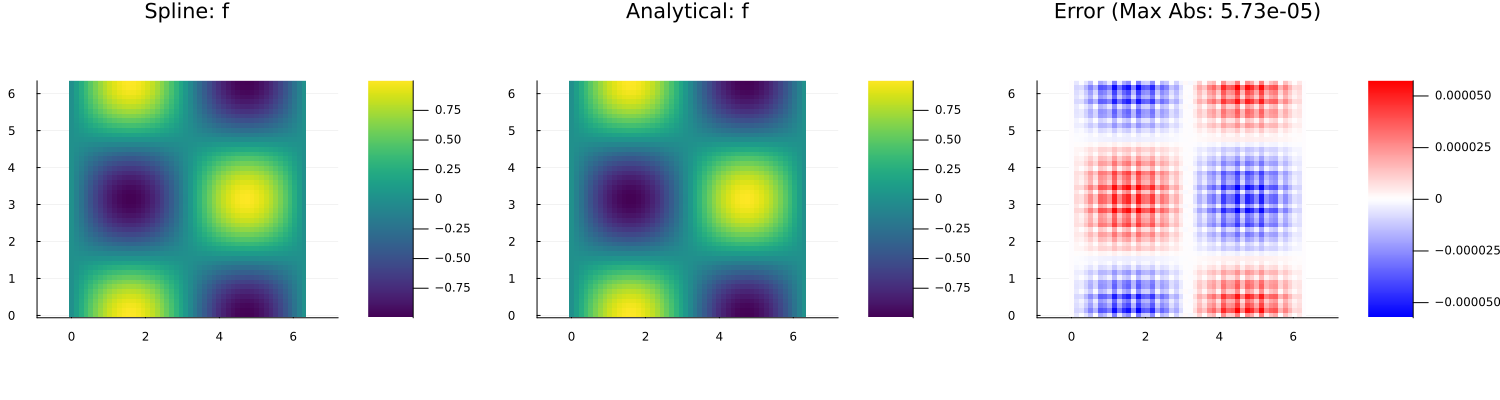

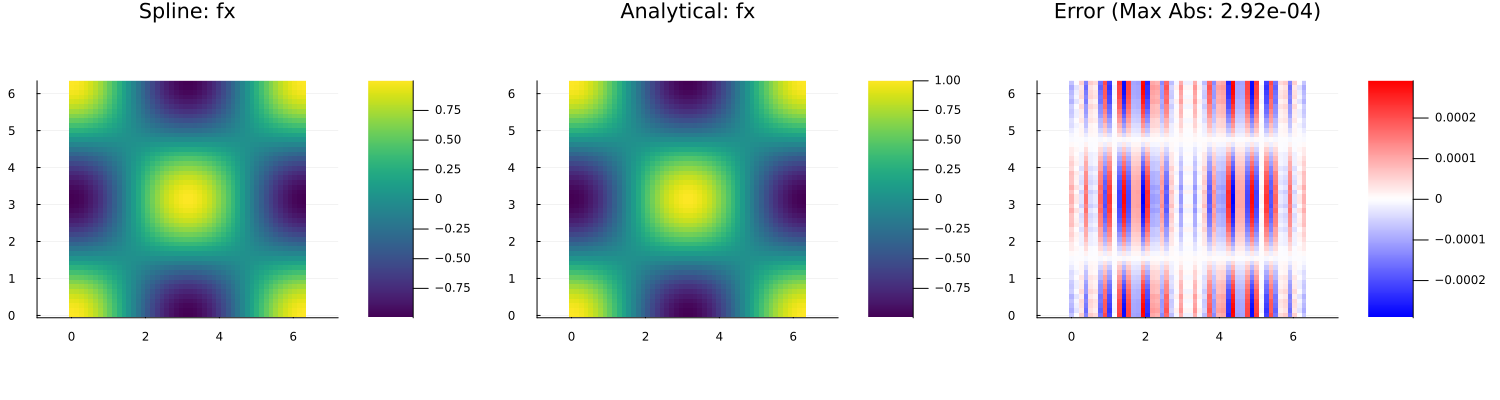

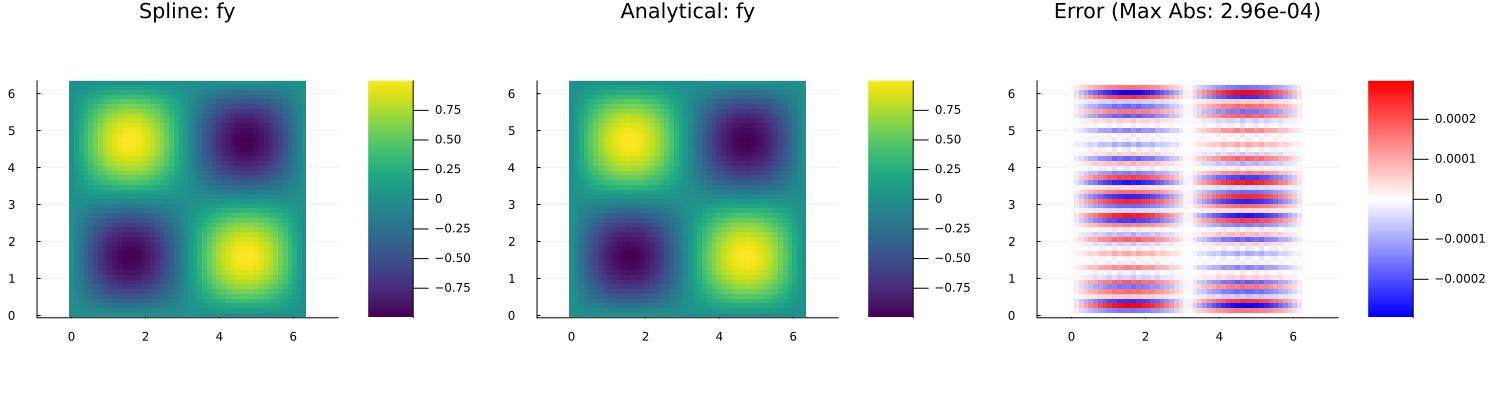

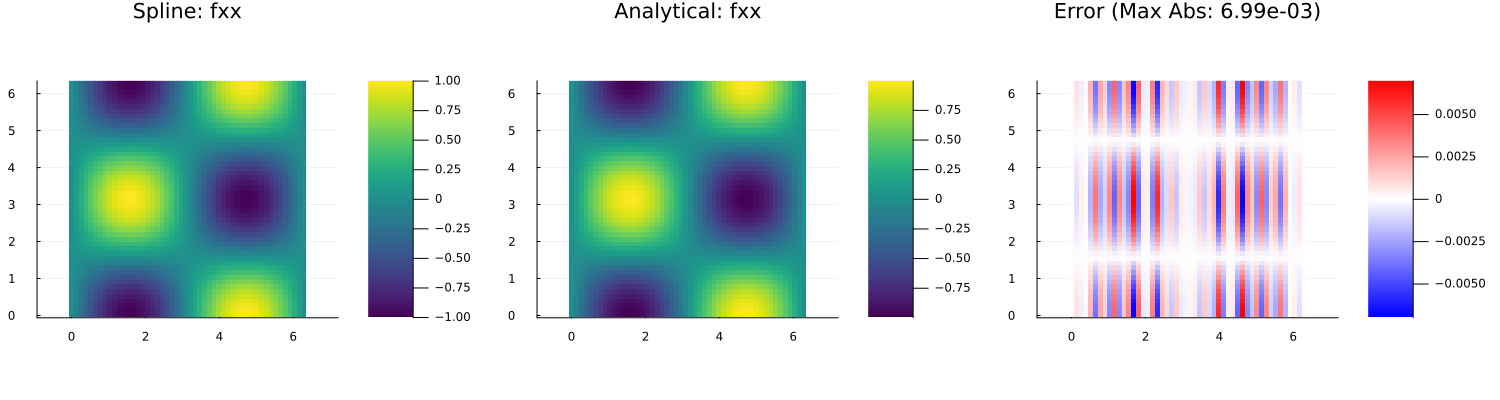

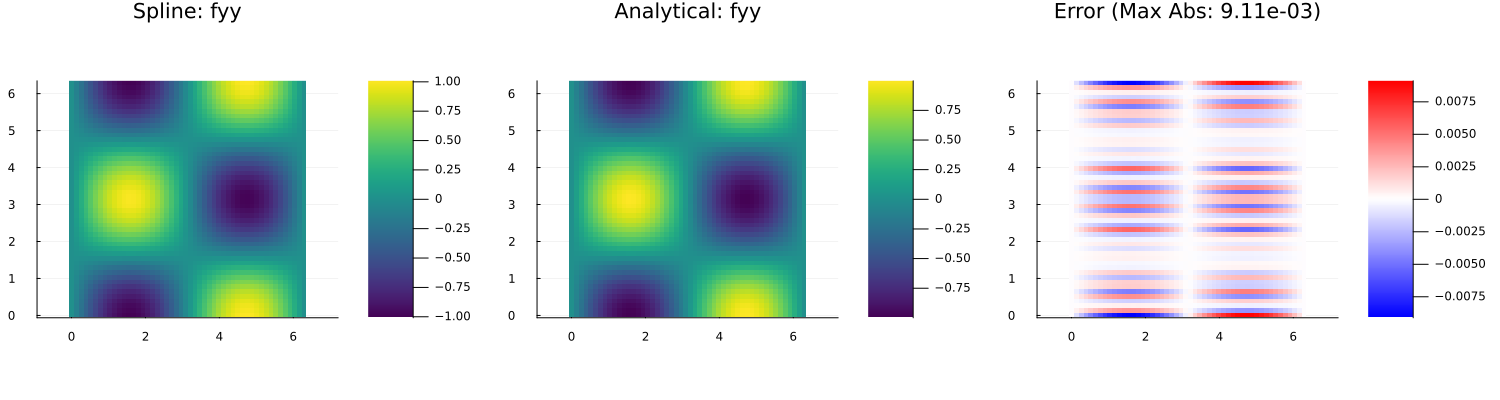

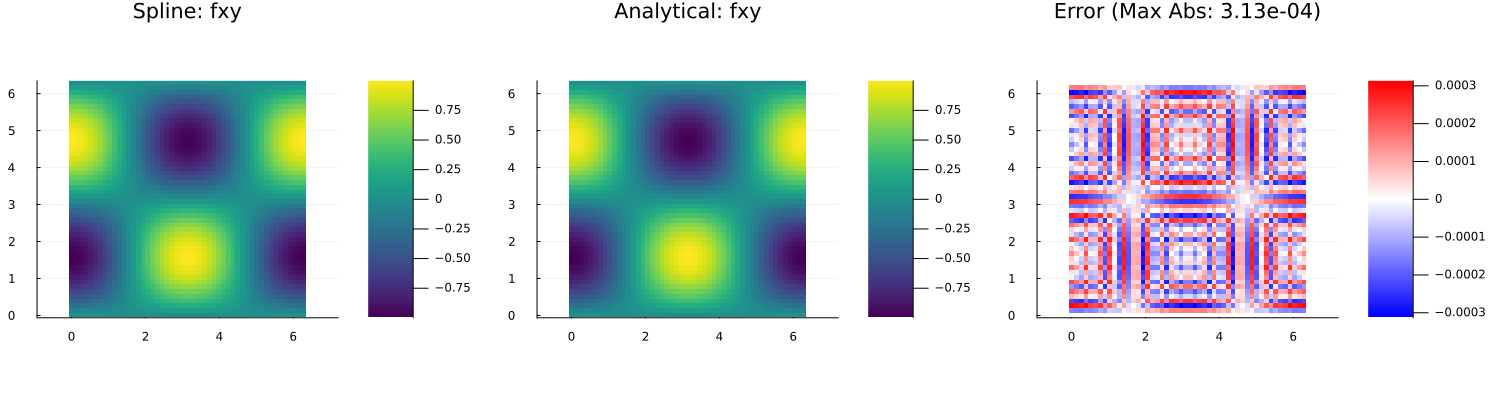

In [5]:
#=
======================================================================
3. VALIDATION FOR 2D BICUBIC SPLINE
======================================================================
=#
println("\n--- Testing 2D Bicubic Spline Derivatives ---")

# --- 3.1 Analytical Functions ---
f_analytic(x, y)   = sin(x) * cos(y)
fx_analytic(x, y)  = cos(x) * cos(y)
fy_analytic(x, y)  = -sin(x) * sin(y)
fxx_analytic(x, y) = -sin(x) * cos(y)
fyy_analytic(x, y) = -sin(x) * cos(y)
fxy_analytic(x, y) = -cos(x) * sin(y)

# --- 3.2 Data Generation (for fitting) ---
nx_nodes, ny_nodes = 20, 20
x_nodes = collect(range(0.0, stop=2*pi, length=nx_nodes))
y_nodes = collect(range(0.0, stop=2*pi, length=ny_nodes))

f_nodes = zeros(nx_nodes, ny_nodes, 1) # n_qty = 1 for this test
for j in 1:ny_nodes, i in 1:nx_nodes
    f_nodes[i, j, 1] = f_analytic(x_nodes[i], y_nodes[j])
end

# --- 3.3 Spline Setup (bctype=2 for periodic in both dimensions) ---
bcspline = JPEC.SplinesMod.bicube_setup(x_nodes, y_nodes, f_nodes, 2, 2)

# --- 3.4 Evaluation ---
nx_fine, ny_fine = 50, 50
x_fine = collect(range(0.0, stop=2*pi, length=nx_fine))
y_fine = collect(range(0.0, stop=2*pi, length=ny_fine))

# Get derivatives up to 2nd order
f_s, fx_s, fy_s, fxx_s, fxy_s, fyy_s = JPEC.SplinesMod.bicube_eval(bcspline, x_fine, y_fine, 2)

# --- 3.5 Plotting Helper Function ---
function generate_bicube_plots(name, spline_data, analytic_func, x_grid, y_grid)
    println("Generating plots for: ", name)
    
    analytical_data = [analytic_func(x, y) for x in x_grid, y in y_grid]
    spline_slice = spline_data[:, :, 1]
    error_data = spline_slice - analytical_data
    max_abs_error = maximum(abs, error_data)
    
    p1 = heatmap(x_grid, y_grid, spline_slice', title="Spline: $name", c=:viridis)
    p2 = heatmap(x_grid, y_grid, analytical_data', title="Analytical: $name", c=:viridis)
    p3 = heatmap(x_grid, y_grid, error_data', title="Error (Max Abs: $(@sprintf("%.2e", max_abs_error)))", c=:bwr)

    return plot(p1, p2, p3, layout=(1, 3), size=(1000, 300), aspect_ratio=:equal)
end

# --- 3.6 Generate and Display all plots ---
display(generate_bicube_plots("f",   f_s,   f_analytic,   x_fine, y_fine))
display(generate_bicube_plots("fx",  fx_s,  fx_analytic,  x_fine, y_fine))
display(generate_bicube_plots("fy",  fy_s,  fy_analytic,  x_fine, y_fine))
display(generate_bicube_plots("fxx", fxx_s, fxx_analytic, x_fine, y_fine)) 
display(generate_bicube_plots("fyy", fyy_s, fyy_analytic, x_fine, y_fine)) 
display(generate_bicube_plots("fxy", fxy_s, fxy_analytic, x_fine, y_fine))

println("\nAll validation tests finished.")

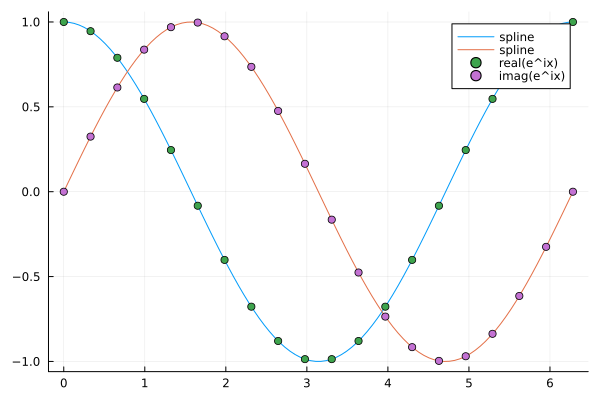

fs size: (20, 20, 2)


JPEC.SplinesMod.BicubicSpline.BicubicSplineType(Ptr{Nothing} @0x000002721486da80, [0.0, 0.3306939635357677, 0.6613879270715354, 0.9920818906073031, 1.3227758541430708, 1.6534698176788385, 1.9841637812146062, 2.3148577447503738, 2.6455517082861415, 2.9762456718219092, 3.306939635357677, 3.6376335988934447, 3.9683275624292125, 4.29902152596498, 4.6297154895007475, 4.960409453036515, 5.291103416572283, 5.621797380108051, 5.9524913436438185, 6.283185307179586], [0.0, 0.3306939635357677, 0.6613879270715354, 0.9920818906073031, 1.3227758541430708, 1.6534698176788385, 1.9841637812146062, 2.3148577447503738, 2.6455517082861415, 2.9762456718219092, 3.306939635357677, 3.6376335988934447, 3.9683275624292125, 4.29902152596498, 4.6297154895007475, 4.960409453036515, 5.291103416572283, 5.621797380108051, 5.9524913436438185, 6.283185307179586], [1.0 1.3246994692046834 … 0.6753005307953163 0.9999999999999998; 1.0 1.3071063563448337 … 0.6928936436551658 0.9999999999999998; … ; 1.0 1.3071063563448337 … 

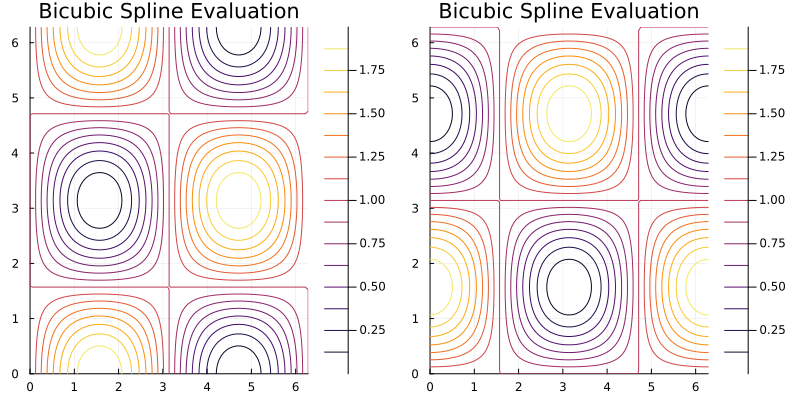

In [ ]:
#validation of fs1, fsx, ...

